In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data_path = "https://raw.githubusercontent.com/ltdaovn/dataset/master/advertising.csv" 

# load the dataset
data = pd.DataFrame(pd.read_csv(data_path))
# print(data)
# data.describe()
# data.info()

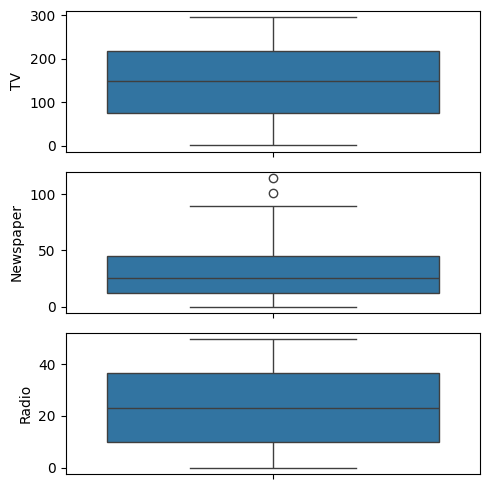

In [8]:
# Kiểm tra dữ liệu null
data.isnull().sum()*100/data.shape[0]

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
fig.tight_layout()

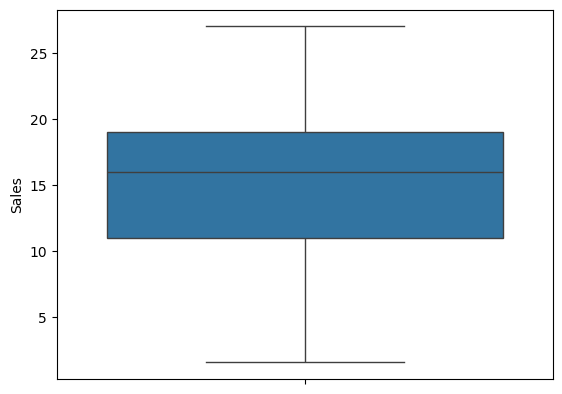

In [9]:
# Biến đầu ra (Sales)
sns.boxplot(data['Sales'])
plt.show()

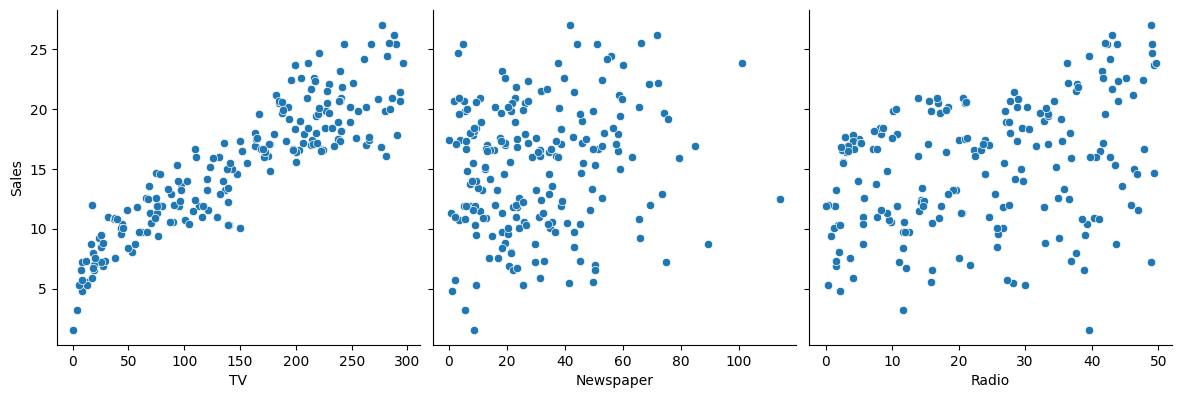

In [10]:
# Vẽ đồ thị phân tán (Scatter Plots) để phân tích mối quan hệ giữa biến đầu ra (Sales) với các biến đầu vào
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

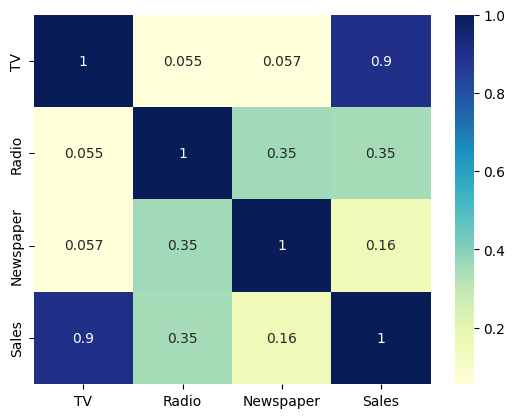

In [11]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [12]:
X = data[['TV']]
y = data['Sales']
# Chia thành 2 tập dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
# Xây dựng mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Tính độ chính xác của mô hình
y_pred = model.predict(X_test)

print("Coefficients: ", model.coef_)
print("Intercept: ", round(model.intercept_,4))
print("Sales =", round(model.intercept_,4), "+", round(model.coef_[0],4), "× TV")

print("mean_squared_error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #calculating the RMSE number

Coefficients:  [0.05454575]
Intercept:  6.9487
Sales = 6.9487 + 0.0545 × TV
mean_squared_error:  2.019296008966231


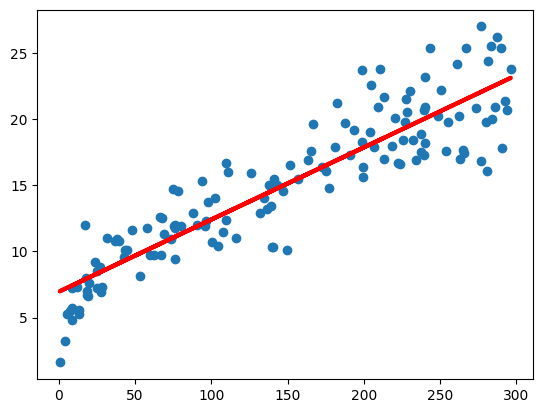

In [18]:
# Vẽ đường hồi quy trên tập dữ liệu huấn luyện
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red', linewidth=3)

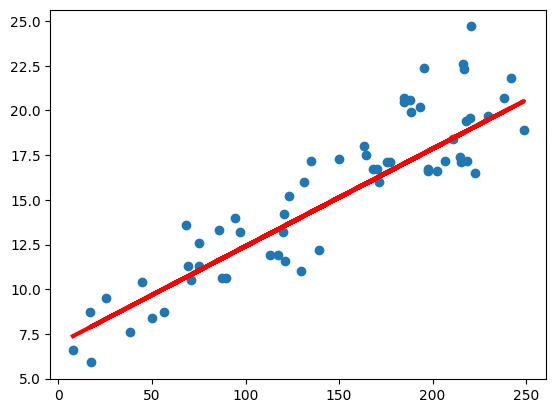

In [19]:
# Vẽ đường hồi quy trên tập dữ liệu kiểm tra
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)